<h1 align="center">
<span style="color: red;">$\textbf{Berstein-Vazirani Algorithm}$</center>
</h1>

- The Berstein-Vazarni Algorithm specializes in finding a secret number. (In our case, the number is going to be some bitstring, since we are in fact dealing with computers.)


- So say we put a secret number in a box, say it’s 1001 (the number 9 in binary), how many steps will it take us to find that secret number?


- This problem seems very trivial, and it’s actually something classical computers can already do.

<h1 align="center">
<span style="color: blue;">$\textbf{Classical Approach}$</center>
</h1>

- The way a classical algorithm would go about approaching this problem, is by going through a series of AND operations, to find our secret number.So, using the number 1001, the classical approach will make its first “guess” as to what the number might be. It’s first guess is always going to be leading zeros, followed by a 1.

- So in our case, it’s first guess is going to be 0001. Now the algorithm is going to query the oracle, and use and AND comparison to see if there’s a 1 in the same spot.
Comparing these two numbers:
              1001

              0001

- We can see that they both have a 1 as the last bit, so this means that the algorithm has found a 1 in that place. (Since AND(1,1) = 1)

- This series of guesses is repeated for every bit in the secret bitsring. So our next guesses are going to be 0010, then 0100, and so forth. Our algorithm just keeps performing these AND operations to see if there is a 1 in that place.Now this seems pretty efficient; better than just guessing and checking. But the thing is this algorithm will have to perform as many steps as there are bits in our secret bitstring. So if we had a bitstring with 1 million bits, we would have to query the black box 1 million times!

<h1 align="center">
<span style="color: blue;">$\textbf{Quantum Approach}$</center>
</h1>

- Quantum computers can take this problem, and find the secret number with just one step.

The algorithm has four main parts.


1. Initialize the first $n$ qubits in the state 10$\rangle,$ and the last qubit in the |1\rangle state. In Qiskit, all qubits are initialized in the 10$\rangle$ state, so we don't need to do anything to the first $n$ qubits. For the last qubit, we initialize it to II $\rangle$ state by applying an $X$ gate.


2. Apply Hadamard gates to all qubits.


3. Build the box containing the secret number (also known as an "oracle"). We will build it as a function that computes $s . x$ modulo 2 by applying $C X$ gates from the first $n$ qubits onto the last qubit whenever there is a 1 in the secret number. We will do this in reverse order, meaning that the there will be a $C X$ gate from the $n$ th qubit to the last qubit if the first bit of the secret number is $1 .$


4. Measure the first $n$ qubits in the Bell basis. This means applying Hadamard gates to the first $n$ qubits again before applying measurements.

In [2]:
# initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.visualization import plot_histogram

In [9]:
s = '1101'   # the hidden binary string
n = len(s) # number of qubits used to represent s


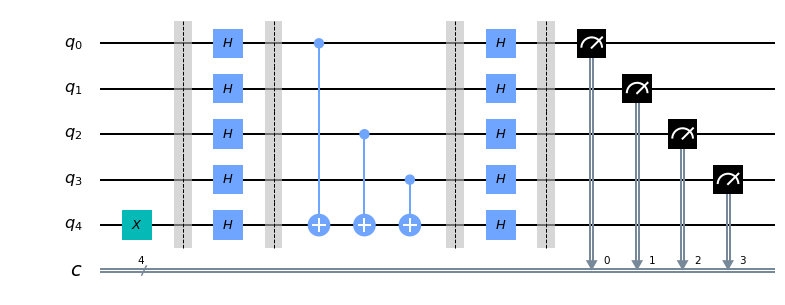

In [12]:
circuit = QuantumCircuit(n+1,n)
# Step 0
circuit.x(n) # the n+1 qubits are indexed 0...n, so the last qubit is index n
circuit.barrier() # just a visual aid for now

# Step 1
circuit.h(range(n+1)) # range(n+1) returns [0,1,2,...,n] in Python. This covers all the qubits
circuit.barrier() # just a visual aid for now

# Step 2
for i, j in enumerate(reversed(s)):
    if j == '1': 
        circuit.cx(i, n)    
circuit.barrier() # just a visual aid for now

# Step 3
circuit.h(range(n+1)) # range(n+1) returns [0,1,2,...,n] in Python. This covers all the qubits
circuit.barrier() # just a visual aid for now
circuit.measure(range(n), range(n)) 

circuit.draw(output='mpl')

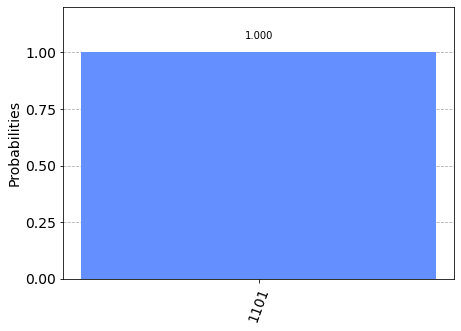

In [13]:
# use local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(circuit, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)